In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [3]:
data = pd.read_csv('/content/drive/MyDrive/NNTW/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


PREPARE DATA

In [135]:
data = np.array(data)
m, n = data.shape #rows, #features+1
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev =-data_dev[0]
X_dev = data_dev[1:n]
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255. #NORMALIZA VALORES PIXELES. Datos son de 1 dimension y es de 0 a 255
_,m_train = X_train.shape


In [127]:
Y_train


array([7, 7, 4, ..., 9, 7, 3])

MATH

In [139]:
def init_params():
  W1 = np.random.rand(10, 784) -0.5 # generate random values from 0 to 1 for each element
  b1 = np.random.rand(10, 1) -0.5
  W2 = np.random.rand(10, 10) -0.5
  b2 = np.random.rand(10, 1) -0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z,0) # if it goes greater than 0, it is Z, less 0, return 0

def softmax(Z):
  Z_shift = Z - np.max(Z, axis=0, keepdims=True)  # estabiliza: resta el máximo por columna
  expZ = np.exp(Z_shift)
  return expZ / np.sum(expZ, axis=0, keepdims=True)

# def softmax(Z):
#     A = np.exp(Z) / sum(np.exp(Z))
#     return A

def forward_propagation (W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max()+1)) #((m, #classes )))
  one_hot_Y[np.arange(Y.size), Y] = 1  #create an arrange from 0 to m (9), labels (classes)
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLU(Z):
  return Z > 0

def back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
  m = Y.shape[0]
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y #preds - label
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
  return dW1, db1, dW2, db2


def update_params (W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha*dW1
  b1 = b1 - alpha*db1
  W2 = W2 - alpha*dW2
  b2 = b2 - alpha*db2

  return W1, b1, W2, b2


In [86]:
print(W1.shape)

(10, 784)


In [143]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [28]:
print(W1.shape)

(10, 784)


In [144]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 300)


Iteration:  0
[4 6 6 ... 5 6 0] [5 4 5 ... 9 1 4]
0.07056097560975609
Iteration:  10
[4 6 6 ... 9 6 9] [5 4 5 ... 9 1 4]
0.1460731707317073
Iteration:  20
[0 6 6 ... 0 6 9] [5 4 5 ... 9 1 4]
0.2444390243902439
Iteration:  30
[0 6 6 ... 0 1 9] [5 4 5 ... 9 1 4]
0.33290243902439026
Iteration:  40
[0 6 5 ... 3 1 1] [5 4 5 ... 9 1 4]
0.42297560975609755
Iteration:  50
[0 6 5 ... 3 1 3] [5 4 5 ... 9 1 4]
0.4852682926829268
Iteration:  60
[0 6 5 ... 3 1 3] [5 4 5 ... 9 1 4]
0.5255853658536586
Iteration:  70
[0 6 5 ... 3 1 9] [5 4 5 ... 9 1 4]
0.5565853658536586
Iteration:  80
[0 4 5 ... 3 1 9] [5 4 5 ... 9 1 4]
0.5866341463414634
Iteration:  90
[0 4 5 ... 3 1 9] [5 4 5 ... 9 1 4]
0.6147560975609756
Iteration:  100
[0 4 5 ... 3 1 9] [5 4 5 ... 9 1 4]
0.6391707317073171
Iteration:  110
[0 4 5 ... 3 1 9] [5 4 5 ... 9 1 4]
0.6615121951219513
Iteration:  120
[0 4 5 ... 3 1 9] [5 4 5 ... 9 1 4]
0.6817317073170732
Iteration:  130
[0 4 5 ... 3 1 9] [5 4 5 ... 9 1 4]
0.7012195121951219
Iteration:  14

In [145]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


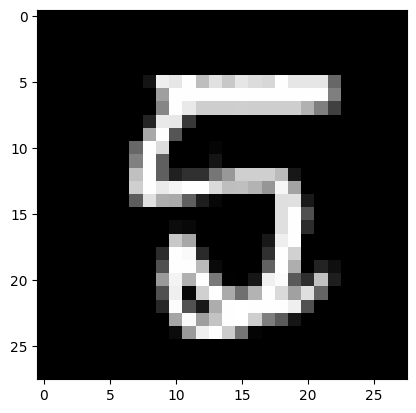

Prediction:  [4]
Label:  4


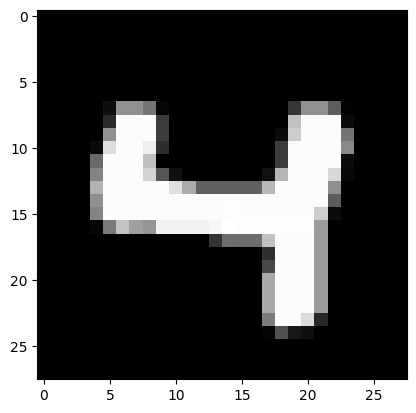

Prediction:  [5]
Label:  5


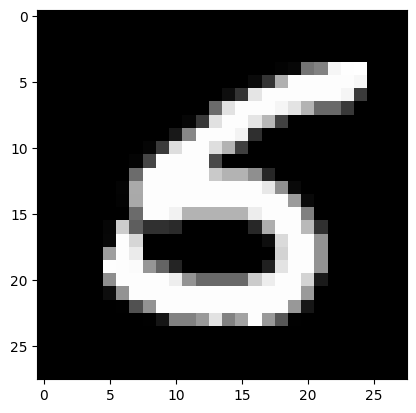

Prediction:  [6]
Label:  6


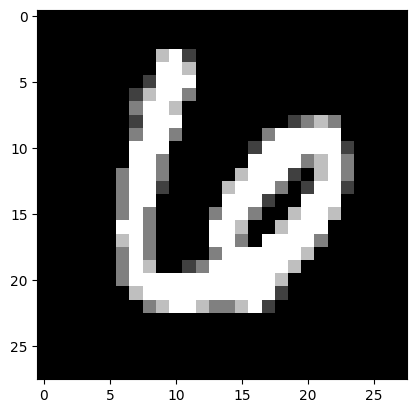

In [147]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(19, W1, b1, W2, b2)